In [1]:
# Regression
    # Numpy 'polyfit' for Simple linear regression with 1 variable
    # Scikit-learn for more advanced/ better tools
        # Preprocessing toolkit - polynomial features
    # Statsmodel library has more R style features/ reporting on model parameters (p-value etc.)
    # MAE / MSE / RMSE
    # Regularization: L1: LASSO, L2: RIDGE, L1+L2: Elastic Net
        # Cross validation metric = 'scorer object' -> higher return values are better (accuracy, -RMSE)
        # Penalty parameter called 'alpha'
    # Lasso/ LassoCV, Ridge/ RidgeCV
        # Cross_val_score - generic approach to running Cross Validation for any model estimator
        # Scoring metrics - SCORERS.keys
    # GridSearchCV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import scipy as sp                        #Q_Q plot
from statsmodels.formula.api import ols   #R-style output of model fit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Linear Regression
* Advertising dataset (from ISLR)
* Numpy's Polyfit
* Scikit-learn - models (Ridge, Lasso, LARS, Elastic Net), CV, regularization
* Model sharing/ deployment

#### Load Data

In [3]:
path = '../../GitHub/Python-Data-Science/DATA/'

In [4]:
df_raw = pd.read_csv(path+'advertising.csv')
df = df_raw.copy()

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df['total_spend'] = df.drop(columns='sales').sum(axis=1)
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

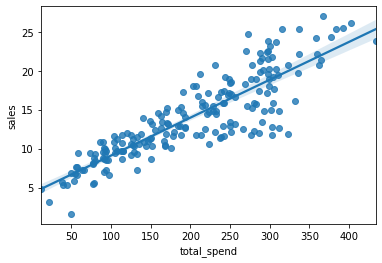

In [7]:
sns.regplot(data=df, x='total_spend', y='sales')          #REGPLOT in SNS

In [8]:
X = df['total_spend']
y = df['sales']

#### Numpy's Polyfit function (for one X variable)
* Degree = 1
* Degree = 3

In [9]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [10]:
# Using NP polyfit for Simple Linear Regression. 
# B1 and B0 ---- HIGHER POWER FIRST
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

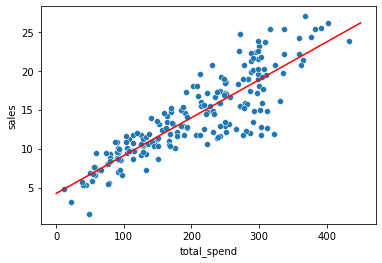

In [11]:
plt.plot(np.linspace(0,450,100), 0.04868788*np.linspace(0,450,100)+4.24302822, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

In [12]:
np.polyfit(X, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

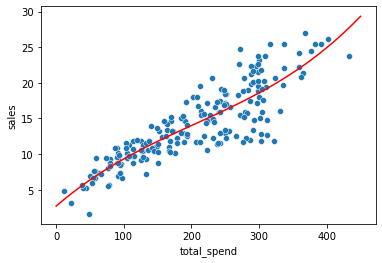

In [13]:
x_val = np.linspace(0,450,100)
y_val = 3.07615033e-07*x_val**3 + -1.89392449e-04*x_val**2 + 8.20886302e-02*x_val**1 + 2.70495053e+00
plt.plot(x_val, y_val, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

## Scikit-learn

In [14]:
# Reset dataset to original
df = df_raw.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


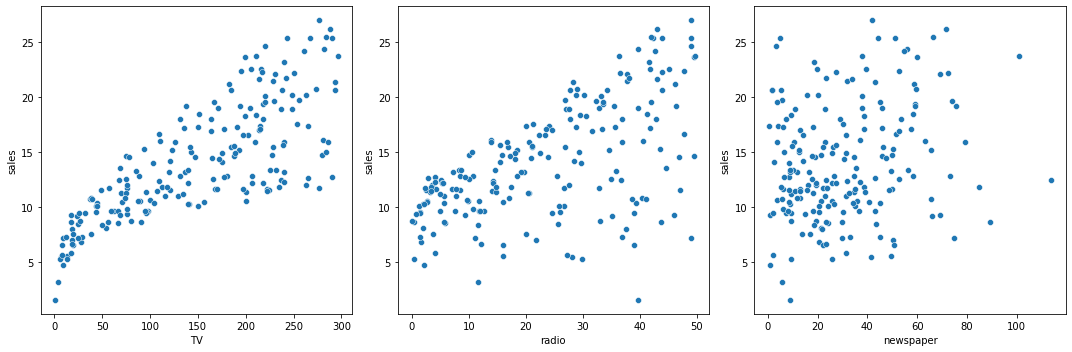

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), sns.scatterplot(data=df, x='TV', y='sales')
plt.subplot(1,3,2), sns.scatterplot(data=df, x='radio', y='sales')
plt.subplot(1,3,3), sns.scatterplot(data=df, x='newspaper', y='sales')
plt.tight_layout()

<AxesSubplot:>

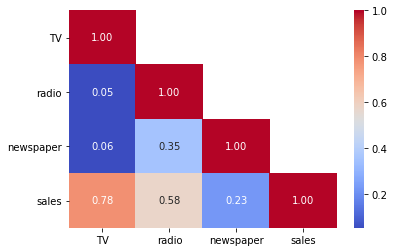

In [16]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, mask=np.triu(np.ones([4,4]), k=1), fmt='.2f')

In [17]:
X = df.drop(columns='sales')
y = df['sales'].copy()

def lm_run(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    print(df.shape, X_train.shape, X_test.shape)
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)

    print('Intercept = {:.2f}'.format(lm.intercept_))
    coeff = pd.DataFrame(data=lm.coef_.reshape(-1,1), index=X.columns, columns=['Coefficients'])
    display(coeff)

    print('MAE  = {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE  = {:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    
    return y_pred, y_test
    
y_pred, y_test = lm_run(X,y)

(200, 4) (140, 3) (60, 3)
Intercept = 3.15


,Coefficients
TV,0.044696
radio,0.187566
newspaper,-0.000323


MAE  = 1.21
MSE  = 2.30
RMSE = 1.52


In [18]:
#Enhancing features manually:
X_en = pd.concat([X, X['TV']*X['radio'], X['TV']**2, X['radio']**2], axis=1)
X_en.columns = ['tv','radio','news','tv_radio','tv2','radio2']
display(X_en.head(2))

y_pred_en, y_test_en = lm_run(X_en, y)

,tv,radio,news,tv_radio,tv2,radio2
0,230.1,37.8,69.2,8697.78,52946.01,1428.84
1,44.5,39.3,45.1,1748.85,1980.25,1544.49


(200, 4) (140, 6) (60, 6)
Intercept = 5.21


,Coefficients
tv,0.051301
radio,0.018739
news,0.005144
tv_radio,0.001110
tv2,-0.000113
radio2,0.000113


MAE  = 0.49
MSE  = 0.43
RMSE = 0.66


In [19]:
def lm_plots(y_test, y_pred):
    res = y_test- y_pred
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    
    plt.subplot(1,3,1)
    sns.scatterplot(x=y_test, y=res).set(xlabel='Y actual', ylabel='Residual', title='Residual vs. True')
    plt.axhline(y=0, color='red', ls='--')
    
    plt.subplot(1,3,2)
    sns.histplot(res, bins=10, kde=True).set(title='Histogram')
    
    plt.subplot(1,3,3)
    sp.stats.probplot(res, plot=plt)

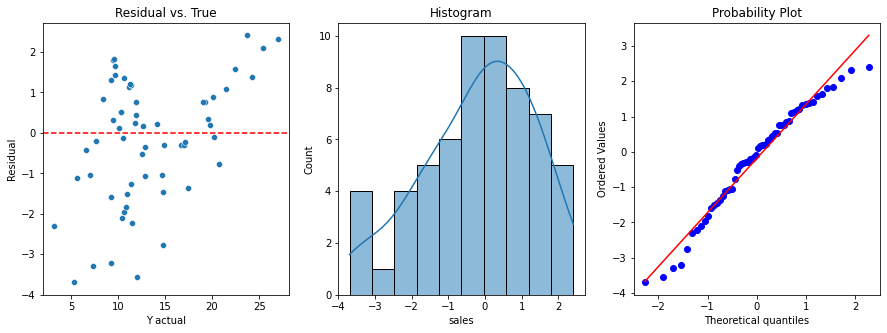

In [20]:
lm_plots(y_test, y_pred)

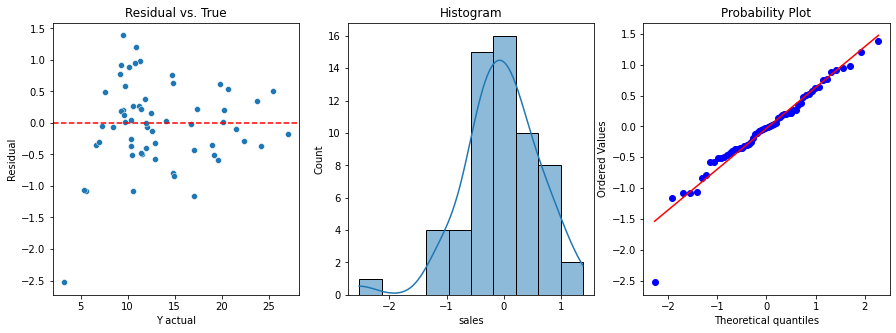

In [21]:
lm_plots(y_test_en, y_pred_en)

In [22]:
df = pd.concat([X_en,y], axis=1)
model = ols("sales ~ tv +radio +tv_radio +tv2 +radio2", data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2740.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          8.17e-178
Time:                        10:44:05   Log-Likelihood:                -186.54
No. Observations:                 200   AIC:                             385.1
Df Residuals:                     194   BIC:                             404.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1944      0.206     25.202      0.000       4.788       5.601
tv             0.0510      0.002     22.801      0.000       0.047       0.055
radio          0.0265      0.012      2.136      0.034       0.002       0.051
tv_radio       0.0011   3.48e-05     30.892      0.000       0.001       0.001
tv2           -0.0001    6.9e-06    -15.914      0.000      -0.000   -9.62e-05
radio2         0.0002      0.000      0.789      0.431      -0.000       0.001
==============================================================================
Omnibus:                      170.235   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4115.221
Skew:                          -2.994   Prob(JB):                         0.00
Kurtosis:                      24.400   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Deployment: Dumping & Loading

In [23]:
final_model = LinearRegression()
final_model.fit(X_en,y)

lm = final_model
print('Intercept = {:.2f}'.format(lm.intercept_))
coeff = pd.DataFrame(data=lm.coef_.reshape(-1,1), index=X_en.columns, columns=['Coefficients'])
display(coeff)


from joblib import dump, load
dump(final_model, 'advertising_final_model.joblib')

Intercept = 5.13


,Coefficients
tv,0.051062
radio,0.025975
news,0.003174
tv_radio,0.001077
tv2,-0.000110
radio2,0.000158


['advertising_final_model.joblib']

In [24]:
lm = load('advertising_final_model.joblib')

print('Intercept = {:.2f}'.format(lm.intercept_))
coeff = pd.DataFrame(data=lm.coef_.reshape(-1,1), index=X_en.columns, columns=['Coefficients'])
display(coeff)

Intercept = 5.13


,Coefficients
tv,0.051062
radio,0.025975
news,0.003174
tv_radio,0.001077
tv2,-0.000110
radio2,0.000158


In [25]:
# 149 TV, 22 Radio, 12 Newspaper
campaign_val = [[149,22,12]]                                   # 2D array
campaign_val[0].extend([campaign_val[0][0]*campaign_val[0][1],
                        campaign_val[0][0]**2,
                        campaign_val[0][1]**2])

In [26]:
print(campaign_val)
lm.predict(campaign_val)[0]

[[149, 22, 12, 3278, 22201, 484]]


14.50382158544458

## Scikit-learn - Preprocessing
* Polynomial features
* Standardisation / Normalization

In [27]:
# Reset dataset to original
df = df_raw.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
X = df.drop('sales', axis=1)
y = df['sales']

In [29]:
Poly_convert = PolynomialFeatures(degree=2, include_bias=True)

X_poly = Poly_convert.fit_transform(X)         #fit, transform, fit_transform
X_poly.shape

(200, 10)

In [30]:
Poly_convert.get_feature_names(X.columns)

['1',
 'TV',
 'radio',
 'newspaper',
 'TV^2',
 'TV radio',
 'TV newspaper',
 'radio^2',
 'radio newspaper',
 'newspaper^2']

In [31]:
def lm_run_d2(X, y):
    
    Poly_convert = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = Poly_convert.fit_transform(X)         #fit, transform, fit_transform
    print(X_poly.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)
    print(df.shape, X_train.shape, X_test.shape)
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)

    print('Intercept = {:.2f}'.format(lm.intercept_))
    coeff = pd.DataFrame(data=lm.coef_.reshape(-1,1), index=Poly_convert.get_feature_names(X.columns), columns=['Coefficients'])
    display(coeff)

    print('MAE  = {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE  = {:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    
    return y_pred, y_test
    
y_pred, y_test = lm_run_d2(X,y)

(200, 9)
(200, 4) (140, 9) (60, 9)
Intercept = 5.13


,Coefficients
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV radio,0.001142
TV newspaper,-0.000052
radio^2,0.000033
radio newspaper,0.000146
newspaper^2,-0.000030


MAE  = 0.49
MSE  = 0.44
RMSE = 0.66


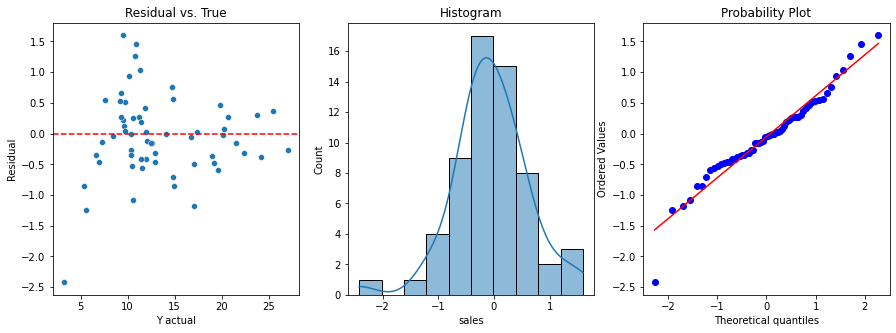

In [32]:
lm_plots(y_test, y_pred)

In [33]:
# Bias-Variance tradeoff

def lm_run_dn(X, y, n):   
    Poly_convert = PolynomialFeatures(degree=n, include_bias=True)
    X_poly = Poly_convert.fit_transform(X)         #fit, transform, fit_transform
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)
        
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    err_train = np.sqrt(mean_squared_error(y_train, lm.predict(X_train)))
    err_test  = np.sqrt(mean_squared_error(y_test, lm.predict(X_test)))  
    print(n, 'RMSE Train = {0:.2f} and Test = {1:.2f}'.format(err_train, err_test))
    return err_train, err_test

err_train, err_test = [], []
for n in range(1,6):
    a, b = lm_run_dn(X, y, n)
    err_train.append(a), err_test.append(b)

1 RMSE Train = 1.73 and Test = 1.52
2 RMSE Train = 0.59 and Test = 0.66
3 RMSE Train = 0.43 and Test = 0.58
4 RMSE Train = 0.47 and Test = 1.26
5 RMSE Train = 0.28 and Test = 3.46


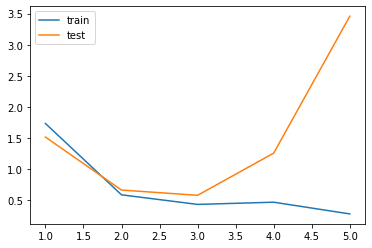

In [34]:
sns.lineplot(x=range(1,6), y=err_train, label='train')
sns.lineplot(x=range(1,6), y=err_test, label='test')
plt.legend()

## Regularization
* Feature scaling becomes important: **Standardisation** ($\mu$=0, $\sigma$=1), **Normalisation**: range [0,1]
* Tuning hyper-parameter using Cross Validation

In [35]:
# Reset dataset to original
df = df_raw.copy()
df.head()
X = df.drop('sales', axis=1)
y = df['sales']

In [36]:
Poly_convert = PolynomialFeatures(degree=2, include_bias=False)
X_poly = Poly_convert.fit_transform(X)
display(X_poly.shape)

(200, 9)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

#### Feature Scaling

In [38]:

scaler = StandardScaler()
scaler.fit(X_train)                    # No Data Leakage from test data

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

#### Ridge - WITHOUT Cross Validation

In [39]:
# Ridge Regression
# help(Ridge)

In [40]:
ridge_model = Ridge(alpha=10)            #Without Cross Validation
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

print('Intercept = {:.2f}'.format(ridge_model.intercept_))
coeff = pd.DataFrame(data=ridge_model.coef_.reshape(-1,1), index=Poly_convert.get_feature_names(X.columns), columns=['Coefficients'])
display(coeff)

RMSE = 0.91
Intercept = 14.31


,Coefficients
TV,2.025356
radio,0.575871
newspaper,0.023727
TV^2,-0.327342
TV radio,2.931528
TV newspaper,0.288801
radio^2,0.212280
radio newspaper,0.111816
newspaper^2,-0.290319


#### Ridge - WITH Cross Validation

In [41]:
from sklearn.metrics import SCORERS
SCORERS.keys()                            #Any of these metric can we used for scoring

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [42]:
ridge_cv_model = RidgeCV(alphas=(.01, 0.1, 1, 5, 10, 100), cv=10, scoring='neg_mean_absolute_error') #MAE
ridge_cv_model.fit(X_train, y_train)
ridge_cv_model.alpha_

1.0

In [43]:
ridge_cv_model = RidgeCV(alphas=(.01, 0.1, 1, 5, 10, 100), cv=10, scoring='neg_root_mean_squared_error')  #RMSE
ridge_cv_model.fit(X_train, y_train)
print('alpha =', ridge_cv_model.alpha_)

y_pred = ridge_cv_model.predict(X_test)  # X_test becomes 'holdout' over here
print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# No Coefficients will be zero
print('Intercept = {:.2f}'.format(ridge_cv_model.intercept_))
coeff = pd.DataFrame(data=ridge_cv_model.coef_.reshape(-1,1), 
                     index=Poly_convert.get_feature_names(X.columns),
                     columns=['Coefficients'])
display(coeff)

alpha = 0.1
RMSE = 0.66
Intercept = 14.31


,Coefficients
TV,4.276021
radio,0.207495
newspaper,0.259034
TV^2,-2.740519
TV radio,3.770400
TV newspaper,-0.262000
radio^2,0.018054
radio newspaper,0.129311
newspaper^2,-0.063729


#### LASSO - WITH Cross Validation

In [44]:
lasso_cv_model = LassoCV() #Default searched over 1000x alpha space, 100 points in between
lasso_cv_model.fit(X_train,y_train)
print('alpha = {:.4f}'.format(lasso_cv_model.alpha_))

y_pred = lasso_cv_model.predict(X_test)  # X_test becomes 'holdout' over here
print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Some Coefficients are Zero
print('Intercept = {:.2f}'.format(lasso_cv_model.intercept_))
coeff = pd.DataFrame(data=lasso_cv_model.coef_.reshape(-1,1), 
                     index=Poly_convert.get_feature_names(X.columns),
                     columns=['Coefficients'])
display(coeff)

alpha = 0.0081
RMSE = 0.66
Intercept = 14.31


,Coefficients
TV,4.086835
radio,0.232181
newspaper,0.123490
TV^2,-2.593047
TV radio,3.754221
TV newspaper,-0.167838
radio^2,0.000000
radio newspaper,0.127180
newspaper^2,-0.000000


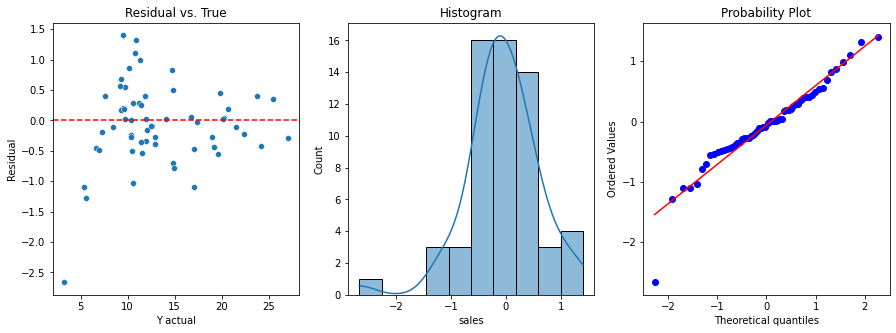

In [45]:
lm_plots(y_test, y_pred)

In [46]:
# Lasso Lars (Least Angle Regression)

from sklearn.linear_model import LassoLarsCV

lassolars_model = LassoLarsCV()
lassolars_model.fit(X_train,y_train)
print('alpha = {:.4f}'.format(lassolars_model.alpha_))

y_pred = lassolars_model.predict(X_test)  # X_test becomes 'holdout' over here
print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Some Coefficients are Zero
print('Intercept = {:.2f}'.format(lassolars_model.intercept_))
coeff = pd.DataFrame(data=lassolars_model.coef_.reshape(-1,1), 
                     index=Poly_convert.get_feature_names(X.columns),
                     columns=['Coefficients'])
display(coeff)

alpha = 0.0008
RMSE = 0.66
Intercept = 14.31


,Coefficients
TV,4.040799
radio,0.235684
newspaper,0.111224
TV^2,-2.553680
TV radio,3.750461
TV newspaper,-0.150838
radio^2,0.000000
radio newspaper,0.124533
newspaper^2,0.000000


#### Elastic Net - two hyperparameters: (a) mix between L1 & L2, and (b) alpha, i.e. amount of penalty

In [47]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.01, .1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100)
elastic_cv_model.fit(X_train, y_train)                                        # Returns fitted model with best parameters

print('alpha = {:.4f}'.format(elastic_cv_model.alpha_))
print('l1 ratio = {:.4f}'.format(elastic_cv_model.l1_ratio_))                 # Ratio =1, i.e. Lasso

y_pred = elastic_cv_model.predict(X_test)                                     # X_test becomes 'holdout' over here
print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

# Some Coefficients are Zero
print('Intercept = {:.2f}'.format(elastic_cv_model.intercept_))
coeff = pd.DataFrame(data=elastic_cv_model.coef_.reshape(-1,1), 
                     index=Poly_convert.get_feature_names(X.columns),
                     columns=['Coefficients'])
display(coeff)                                                                #Same o/p as Lasso Model

alpha = 0.0081
l1 ratio = 1.0000
RMSE = 0.66
Intercept = 14.31


,Coefficients
TV,4.086835
radio,0.232181
newspaper,0.123490
TV^2,-2.593047
TV radio,3.754221
TV newspaper,-0.167838
radio^2,0.000000
radio newspaper,0.127180
newspaper^2,-0.000000


#### Generic Functions: GridSearchCV and cross_validate

In [48]:
# Cross_val_score & Cross_validate allow us to calculate Scores by running k-fold CV.. 
# DOESN'T TUNE A PARAMETER
# Model needs to be fitted again afterwards

from sklearn.model_selection import cross_val_score     # can accomodate one metrics
from sklearn.model_selection import cross_validate      # can accomodate multiple metrics

In [49]:
# Cross_validate allows us to run CV and measure scores
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        cv=10,
                        scoring =['neg_root_mean_squared_error', 'neg_mean_squared_error'])

scores = pd.DataFrame(scores)
print(scores.mean())
scores

fit_time                            0.002191
score_time                          0.001504
test_neg_root_mean_squared_error   -0.621241
test_neg_mean_squared_error        -0.507687
dtype: float64


,fit_time,score_time,test_neg_root_mean_squared_error,test_neg_mean_squared_error
0,0.003987,0.001995,-0.515583,-0.265825
1,0.003990,0.002046,-0.598193,-0.357834
2,0.002996,0.001994,-0.438816,-0.192560
3,0.002995,0.003994,-0.603155,-0.363796
4,0.004027,0.001988,-0.392131,-0.153767
5,0.000951,0.001029,-1.629415,-2.654993
6,0.000967,0.000000,-0.393978,-0.155218
7,0.000997,0.000998,-0.626634,-0.392670
8,0.000000,0.000997,-0.620377,-0.384868
9,0.000997,0.000000,-0.394127,-0.155336


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
base_model = ElasticNet()      # no need to define parameters here

def gs_run(base_model, grid):
    grid_model = GridSearchCV(base_model, param_grid=grid, cv=10, scoring='neg_root_mean_squared_error')
    
    grid_model.fit(X_train, y_train)
    
    print(grid_model.best_estimator_)
    print(grid_model.best_score_)
    
    return pd.DataFrame(grid_model.cv_results_)

In [52]:
grid = {'alpha':np.linspace(0.1, 10, 100),
        'l1_ratio':np.linspace(0.1, 1, 10)}

res = gs_run(base_model, grid)

ElasticNet(alpha=0.1, l1_ratio=0.8)
-0.9226150775139814


In [53]:
grid2 = {'alpha':np.linspace(0.001, 0.2, 100),
         'l1_ratio':np.linspace(0.7, 1, 10)}

res = gs_run(base_model, grid2)

ElasticNet(alpha=0.00703030303030303, l1_ratio=1.0)
-0.6001386417790594


In [54]:
grid3 = {'alpha':np.linspace(0.005, 0.009, 100),
         'l1_ratio':np.linspace(0.9, 1, 4)}

res = gs_run(base_model, grid3)

ElasticNet(alpha=0.008151515151515151, l1_ratio=1.0)
-0.599935941813613


In [55]:
grid4 = {'alpha':np.linspace(0.008, 0.0089, 20),
         'l1_ratio':[1]}

res = gs_run(base_model, grid4)

ElasticNet(alpha=0.008142105263157895, l1_ratio=1)
-0.5999359828675971


In [61]:
grid_model = GridSearchCV(base_model, param_grid=grid4, cv=10, scoring='neg_root_mean_squared_error')
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.008     , 0.00804737, 0.00809474, 0.00814211, 0.00818947,
       0.00823684, 0.00828421, 0.00833158, 0.00837895, 0.00842632,
       0.00847368, 0.00852105, 0.00856842, 0.00861579, 0.00866316,
       0.00871053, 0.00875789, 0.00880526, 0.00885263, 0.0089    ]),
                         'l1_ratio': [1]},
             scoring='neg_root_mean_squared_error')

In [66]:
grid_model.cv_results_

{'mean_fit_time': array([0.00118937, 0.00079806, 0.00069809, 0.00159204, 0.00098972,
        0.00089679, 0.00070007, 0.00059831, 0.00059621, 0.00010009,
        0.00060077, 0.00089555, 0.00019946, 0.00099676, 0.00069802,
        0.00022435, 0.0015173 , 0.00069685, 0.00100312, 0.0004951 ]),
 'std_fit_time': array([1.24151321e-03, 3.99306893e-04, 4.57007223e-04, 9.08343392e-04,
        6.31658777e-04, 5.42864500e-04, 4.58386180e-04, 4.88523407e-04,
        4.86948467e-04, 3.00264359e-04, 4.90607042e-04, 2.98608906e-04,
        3.98923691e-04, 1.50245517e-05, 4.56986215e-04, 4.51183070e-04,
        1.03900818e-03, 4.56452040e-04, 1.05978064e-05, 4.95194829e-04]),
 'mean_score_time': array([5.95855713e-04, 2.99119949e-04, 2.99215317e-04, 6.09350204e-04,
        4.97102737e-04, 2.02751160e-04, 2.99453735e-04, 3.03006172e-04,
        9.92536545e-05, 5.98406792e-04, 4.99153137e-04, 2.01416016e-04,
        0.00000000e+00, 0.00000000e+00, 3.99017334e-04, 9.52005386e-05,
        7.05480576e-04, 

In [62]:
grid_model.predict(X_test)

array([13.87590131, 19.35538713, 12.24395295, 16.64924959,  8.10344222,
        7.06225385, 20.15659105, 17.47263648, 10.53397053, 20.08155998,
        9.58048056, 14.08320117, 12.03399185, 23.30331999, 19.6319752 ,
        9.23305278, 12.15171759,  9.29365151,  8.50785484, 21.61339874,
        7.20140507, 19.26539959, 27.2915701 , 24.61567027,  9.13138352,
       11.75346448, 20.50964961,  9.15600219, 12.69445466,  8.61476599,
        8.63700055, 20.1584185 , 10.90859387,  6.87543911, 18.19640892,
        9.41484721, 10.31632671,  9.68316523,  7.49018558, 10.99713587,
       12.58568741, 10.57835538, 11.14380763,  7.48229232, 11.39224319,
       10.30796022,  6.39715456, 15.50061179, 13.29481264, 22.62386123,
       10.39109601, 13.17200862, 14.30804126, 11.88266455, 11.63444052,
        5.86770471, 25.04611315,  9.69724067, 17.42472898, 15.68356298])

In [63]:
np.sqrt(mean_squared_error(y_test, grid_model.predict(X_test)))

0.6575132290260559

The end 